In [ ]:
!pip install numpy pandas seaborn matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('out_1.csv', index_col=0)
data.head(10)

,client_id,f1_1,f1_7,f1_14,f1_28,huffman_complexity
0,2190618,0.910891,0.822222,0.924731,0.886076,0.037086
1,208625,0.952381,0.960000,0.936170,0.964706,0.042282
2,3483687,1.000000,1.000000,NaN,NaN,0.022654
3,3441340,NaN,NaN,NaN,NaN,0.034859
4,1421807,NaN,NaN,NaN,NaN,0.038348
5,2117702,NaN,NaN,NaN,NaN,0.041873
6,576313,NaN,NaN,NaN,NaN,0.041189
7,3115758,1.000000,1.000000,0.000000,0.000000,0.042801
8,1680201,0.000000,0.923077,0.782609,0.880000,0.040309
9,1385906,1.000000,0.000000,0.000000,0.000000,0.027922


In [37]:
data = data.iloc[5:148]
data.head(5)
data['huffman_complexity'] = data['huffman_complexity'] * 4

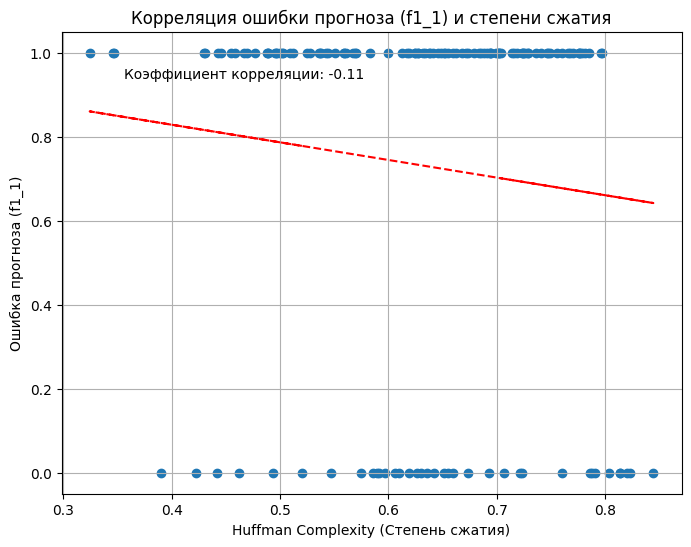

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(data['huffman_complexity'], data['f1_1'])
plt.xlabel('Huffman Complexity (Степень сжатия)')
plt.ylabel('Ошибка прогноза (f1_1)')
plt.title('Корреляция ошибки прогноза (f1_1) и степени сжатия')

# Добавление линии тренда (линейная регрессия)
z = np.polyfit(data['huffman_complexity'], data['f1_1'], 1)
p = np.poly1d(z)
plt.plot(data['huffman_complexity'], p(data['huffman_complexity']), "r--")

# Вывод коэффициента корреляции
correlation = data['huffman_complexity'].corr(data['f1_1'])
plt.text(0.1, 0.9, f'Коэффициент корреляции: {correlation:.2f}', transform=plt.gca().transAxes)

plt.grid(True)
plt.show()

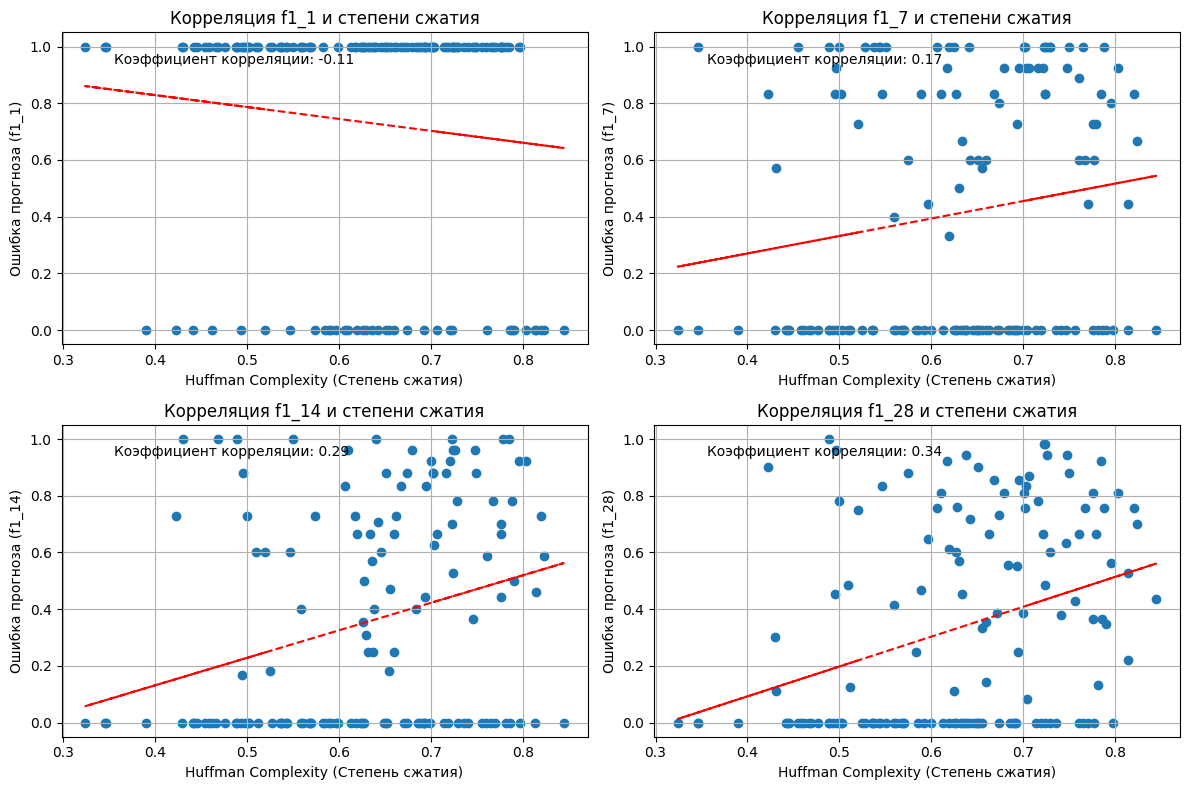

In [39]:
features = ['f1_1', 'f1_7', 'f1_14', 'f1_28']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(data['huffman_complexity'], data[feature])
    ax.set_xlabel('Huffman Complexity (Степень сжатия)')
    ax.set_ylabel(f'Ошибка прогноза ({feature})')
    ax.set_title(f'Корреляция {feature} и степени сжатия')

    z = np.polyfit(data['huffman_complexity'], data[feature], 1)
    p = np.poly1d(z)
    ax.plot(data['huffman_complexity'], p(data['huffman_complexity']), "r--")

    correlation = data['huffman_complexity'].corr(data[feature])
    ax.text(0.1, 0.9, f'Коэффициент корреляции: {correlation:.2f}', transform=ax.transAxes)
    ax.grid(True)

plt.tight_layout()
plt.show()